In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pf = r'C:\Users\DeLL\Desktop\ML\youTube_Stock_price_prediction\Data\hpq.us.txt'

In [3]:
df = pd.read_csv(pf,delimiter=',',
                usecols = ['Date','Open','High','Close'])

In [4]:
df.head()

,Date,Open,High,Close
0,1970-01-02,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.31385
2,1970-01-06,0.31385,0.31385,0.30996
3,1970-01-07,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385


([<matplotlib.axis.XTick at 0x1e4b9d45430>,
 [Text(0, 0, '1970-01-02'),
  Text(0, 0, '1971-12-23'),
  Text(0, 0, '1973-12-18'),
  Text(0, 0, '1975-12-10'),
  Text(0, 0, '1977-12-02'),
  Text(0, 0, '1979-11-26'),
  Text(0, 0, '1981-11-17'),
  Text(0, 0, '1983-11-08'),
  Text(0, 0, '1985-10-31'),
  Text(0, 0, '1987-10-23'),
  Text(0, 0, '1989-10-16'),
  Text(0, 0, '1991-10-08'),
  Text(0, 0, '1993-09-29'),
  Text(0, 0, '1995-09-21'),
  Text(0, 0, '1997-09-12'),
  Text(0, 0, '1999-09-08'),
  Text(0, 0, '2001-08-31'),
  Text(0, 0, '2003-09-03'),
  Text(0, 0, '2005-08-26'),
  Text(0, 0, '2007-08-23'),
  Text(0, 0, '2009-08-18'),
  Text(0, 0, '2011-08-11'),
  Text(0, 0, '2013-08-08'),
  Text(0, 0, '2015-08-04'),
  Text(0, 0, '2017-07-28')])

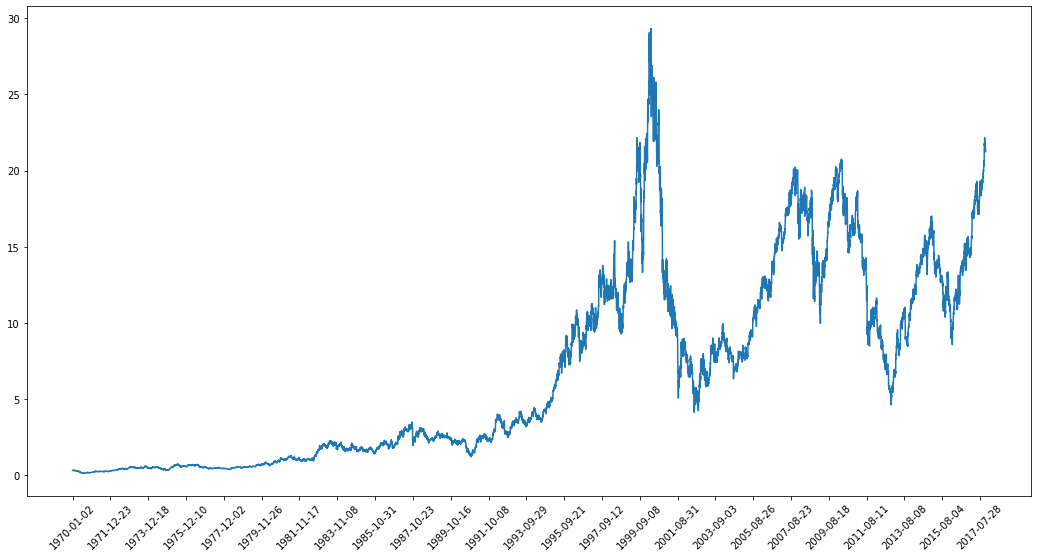

In [6]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)

In [7]:
D = df.iloc[:,1:2].values

In [8]:
D.shape

(12075, 1)

In [9]:
N = 10000
Tr_set = D[:N]
Ts_set = D[N:]

In [10]:
Tr_set.shape

(10000, 1)

In [11]:
Ts_set.shape

(2075, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [14]:
sc = MinMaxScaler(feature_range =(0,1))

In [15]:
Tr_scaled = sc.fit_transform(Tr_set)
Ts_scaled = sc.transform(Ts_set)

In [20]:
seq_len = 100
X_train = []
y_train = []
for i in range(seq_len,len(Tr_scaled)-seq_len):
    X_train.append(Tr_scaled[i-seq_len:i,0])
    y_train.append(Tr_scaled[i,0])


In [21]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [22]:
X_train.shape

(9800, 100)

In [23]:
y_train.shape

(9800,)

In [24]:
seq_len = 100
X_test = []
y_test = []
for i in range(seq_len,len(Ts_scaled)-seq_len):
    X_test.append(Ts_scaled[i-seq_len:i,0])
    y_test.append(Ts_scaled[i,0])


In [29]:
X_test,y_test = np.array(X_test),np.array(y_test)

In [25]:
X_train.shape

(9800, 100)

In [26]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [27]:
X_train.shape

(9800, 100, 1)

In [30]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [31]:
X_test.shape

(1875, 100, 1)

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(
    units=50,return_sequences=True,
    input_shape=(X_train.shape[1],1)
))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.GRU(units=50,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=32))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))

In [33]:
model.compile(optimizer='adam',loss=tf.keras.losses.mse)

In [34]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
307/307 [==============================] - 35s 113ms/step - loss: 0.0027
Epoch 2/10
307/307 [==============================] - 33s 107ms/step - loss: 0.0010
Epoch 3/10
307/307 [==============================] - 33s 109ms/step - loss: 8.3032e-04
Epoch 4/10
307/307 [==============================] - 34s 110ms/step - loss: 7.7510e-04
Epoch 5/10
307/307 [==============================] - 33s 109ms/step - loss: 7.3449e-04
Epoch 6/10
307/307 [==============================] - 34s 110ms/step - loss: 7.1733e-04
Epoch 7/10
307/307 [==============================] - 33s 109ms/step - loss: 7.1218e-04
Epoch 8/10
307/307 [==============================] - 34s 110ms/step - loss: 6.3589e-04
Epoch 9/10
307/307 [==============================] - 34s 111ms/step - loss: 5.8566e-04
Epoch 10/10
307/307 [==============================] - 34s 110ms/step - loss: 5.8338e-04


In [35]:
y_hat = model.predict(X_test)

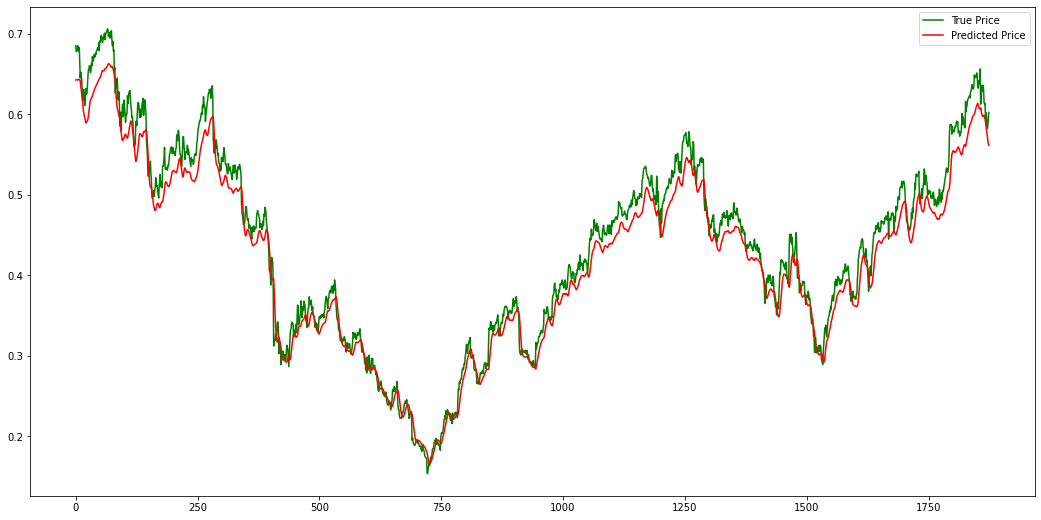

In [36]:
plt.figure(figsize=(18,9))
plt.plot(y_test,color='green',label='True Price')
plt.plot(y_hat,color='red',label='Predicted Price')
plt.legend()
plt.show()
